# Data Preparation: Cleaning a Messy HR Analytics Dataset

## Introduction

In HR analytics, data quality is crucial for generating reliable insights. However, raw datasets often contain inconsistencies, missing values, duplicate records, and formatting issues. Cleaning and preprocessing the data is a fundamental step to ensure accuracy in downstream analysis and machine learning models.

This document outlines the process of cleaning a messy HR analytics dataset, including handling missing values, correcting data inconsistencies, removing duplicates, and standardizing formats. By following these steps, we aim to improve data quality and ensure it is ready for effective analysis.

## Cleaning Steps Overview
1. **Handling Missing Data** – Identifying and filling or removing missing values.
2. **Removing Duplicates** – Eliminating redundant records.
3. **Standardizing Formats** – Ensuring consistency in categorical and numerical fields.
4. **Correcting Inconsistencies** – Resolving typos, outliers, and erroneous entries.
5. **Encoding Categorical Variables** – Preparaggregation and visualisationarning models.

In [117]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# import dataset
messy_hr_dataset = pd.read_csv(r'Messy_HR_Dataset.csv')

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

# check the first 10 rows of the dataset
messy_hr_dataset.head(10)

,Unnamed: 0,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,TerminationDescription,DepartmentType,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,0,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,Zone C,Temporary,Unk,NaN,Production,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4,3427,14-01-2023,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,South Marisa,Taylor Rodriguez,2,606.11
1,1,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,Zone A,Part-Time,Unk,NaN,Production,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,3428,09-09-2022,2,1,5,12-Sep-22,Customer Service,External,Incomplete,Tammieville,Kelly Patterson DDS,4,673.02
2,2,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,Zone B,Part-Time,Unk,NaN,Sales,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,3429,27-05-2023,1,2,1,13-Aug-22,Leadership Development,External,Failed,East Roberthaven,Taylor Thomas,2,413.28
3,3,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,Zone A,Full-Time,Unk,NaN,Sales,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2,3430,16-06-2023,5,5,4,15-Dec-22,Project Management,External,Completed,Garzatown,Holly Elliott,3,663.78
4,4,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,Zone A,Temporary,Unk,NaN,Sales,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3,3431,25-11-2022,2,5,3,13-Jul-23,Technical Skills,External,Failed,Lake Meganville,Donald Martinez,5,399.03
5,5,Maruk,Fraval,17-Jan-20,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,Contract,Zone B,Full-Time,Unk,NaN,Sales,Field Operations,03-04-1949,CT,Driver,Male,6050,Black,Married,Fully Meets,3,3432,12-12-2022,2,3,5,18-Apr-23,Project Management,Internal,Passed,Kingchester,Holly Sloan,2,820.33
6,6,Latia,Costa,06-Apr-22,03-Jul-23,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Me see picture nature degree benefit.,Sales,General - Eng,01-07-1942,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4,3433,25-03-2023,1,5,2,06-Aug-22,Customer Service,External,Passed,Lancehaven,David Stewart,5,295.08
7,7,Sharlene,Terry,06-Nov-20,29-Jan-23,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Blue community type skill story.,Sales,Engineers,07-03-1957,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2,3434,21-04-2023,1,4,2,07-Oct-22,Leadership Development,Internal,Passed,Jeremyshire,Stephanie Garza,3,790.15
8,8,Jac,McKinzie,18-Aug-18,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,Contract,Zone B,Part-Time,Unk,NaN,Sales,Executive,15-05-1974,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3,3435,09-12-2022,4,3,3,19-Jul-23,Customer Service,Internal,Passed,West Randall,John Brown,3,798.40
9,9,Joseph,Martins,21-Jan-22,29-Jun-23,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,Part-Time,Zone B,Temporary,Resignation,Summer personal bag.,Sales,Engineers,11-11-1949,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5,3436,30-07-2023,5,5,2,09-Apr-23,Leadership Development,Internal,Failed,Nicolebury,Megan Wilson,5,192.61


In [119]:
messy_hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3150 non-null   int64  
 1   FirstName                   3150 non-null   object 
 2   LastName                    3150 non-null   object 
 3   StartDate                   3150 non-null   object 
 4   ExitDate                    1606 non-null   object 
 5   Title                       3150 non-null   object 
 6   Supervisor                  3150 non-null   object 
 7   ADEmail                     3150 non-null   object 
 8   BusinessUnit                3150 non-null   object 
 9   EmployeeStatus              3150 non-null   object 
 10  EmployeeType                3150 non-null   object 
 11  PayZone                     3150 non-null   object 
 12  EmployeeClassificationType  3150 non-null   object 
 13  TerminationType             3150 

In [120]:
messy_hr_dataset.describe()

,Unnamed: 0,LocationCode,Current Employee Rating,Employee ID,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1495.748254,45155.332698,2.968254,2502.748254,2.943492,3.021270,2.992381,2.971746,560.525889
std,867.007861,30019.418852,1.020717,866.241991,1.430727,1.407413,1.409244,1.415390,262.485994
min,0.000000,1013.000000,1.000000,1001.000000,1.000000,1.000000,1.000000,1.000000,100.040000
25%,746.000000,17616.500000,2.000000,1750.250000,2.000000,2.000000,2.000000,2.000000,331.475000
50%,1495.500000,44455.500000,3.000000,2504.500000,3.000000,3.000000,3.000000,3.000000,574.300000
75%,2246.750000,71713.250000,3.000000,3254.750000,4.000000,4.000000,4.000000,4.000000,788.070000
max,2999.000000,98052.000000,5.000000,4000.000000,5.000000,5.000000,5.000000,5.000000,999.970000


Unnamed: 0                       0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1544
Title                            0
Supervisor                       0
ADEmail                          0
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1544
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
Employee ID                      0
Survey Date                      0
Engagement Score    

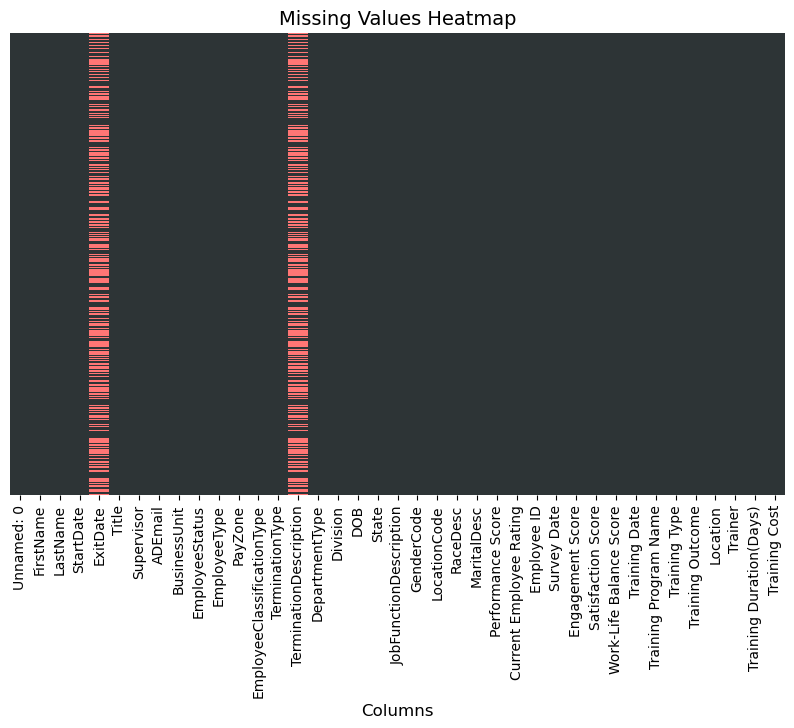

In [121]:
# check for missing values
print(messy_hr_dataset.isnull().sum())

# Create null check heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(messy_hr_dataset.isnull(), 
            cmap=['#2d3436', '#ff7675'], 
            cbar=False, 
            yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.show()

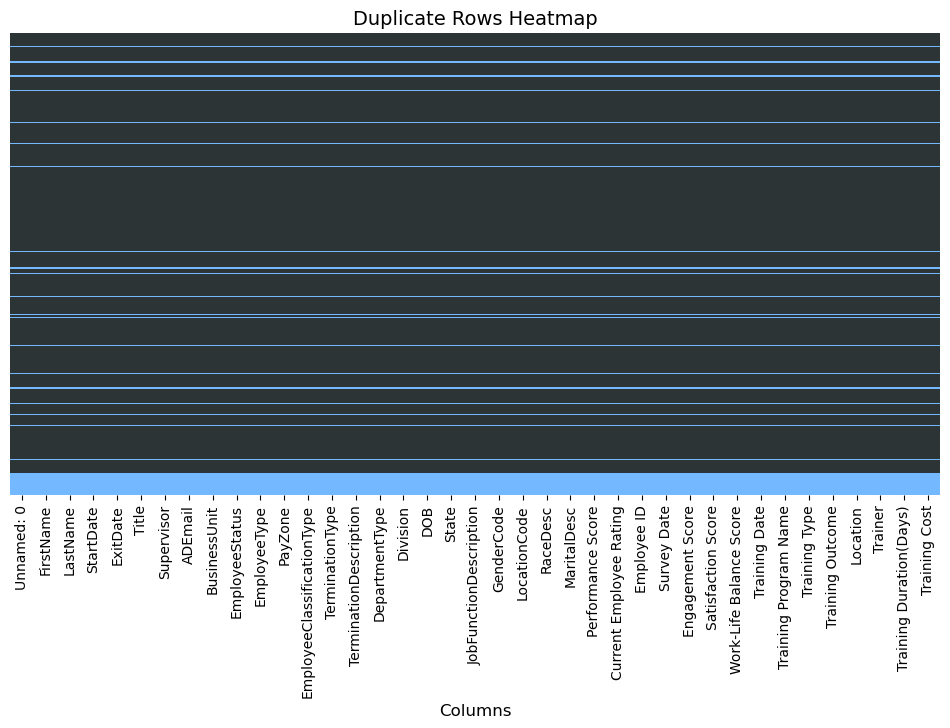

In [122]:
# check for duplicates
messy_hr_dataset.duplicated().sum()

# Identify all duplicate rows (mark all duplicates)
duplicates = messy_hr_dataset.duplicated(keep=False)

# Create a boolean matrix of duplicates
dup_matrix = pd.DataFrame(
    np.repeat(duplicates.values[:, None], messy_hr_dataset.shape[1], axis=1),
    columns=messy_hr_dataset.columns
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    dup_matrix,
    cmap=['#2d3436', '#74b9ff'],  # Black = unique, Blue = duplicate
    cbar=False,
    yticklabels=False
)
plt.title("Duplicate Rows Heatmap", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.show()

In [123]:
# drop duplicates
messy_hr_dataset.drop_duplicates(inplace=True)

# check for duplicates
messy_hr_dataset.duplicated().sum()

0

In [124]:
# Print the columns of the dataset

messy_hr_dataset.columns.to_list()

['Unnamed: 0',
 'FirstName',
 'LastName',
 'StartDate',
 'ExitDate',
 'Title',
 'Supervisor',
 'ADEmail',
 'BusinessUnit',
 'EmployeeStatus',
 'EmployeeType',
 'PayZone',
 'EmployeeClassificationType',
 'TerminationType',
 'TerminationDescription',
 'DepartmentType',
 'Division',
 'DOB',
 'State',
 'JobFunctionDescription',
 'GenderCode',
 'LocationCode',
 'RaceDesc',
 'MaritalDesc',
 'Performance Score',
 'Current Employee Rating',
 'Employee ID',
 'Survey Date',
 'Engagement Score',
 'Satisfaction Score',
 'Work-Life Balance Score',
 'Training Date',
 'Training Program Name',
 'Training Type',
 'Training Outcome',
 'Location',
 'Trainer',
 'Training Duration(Days)',
 'Training Cost']

In [125]:
# Display unique values for each column

number_of_columns_displayed = 0

for column in messy_hr_dataset.columns:
    if messy_hr_dataset[column].unique().size < 30:
        print(f'{column} : {messy_hr_dataset[column].unique()}')
        number_of_columns_displayed += 1

print(f'\n{number_of_columns_displayed} columns were displayed')

print(f'\ncolumn not displayed\n')

for columns in messy_hr_dataset.columns:
    if messy_hr_dataset[columns].unique().size >= 30:
        print(f'{columns}')

BusinessUnit : ['CCDR' 'EW' 'PL' 'TNS' 'BPC' 'WBL' 'NEL' 'SVG' 'MSC' 'PYZ']
EmployeeStatus : ['Active' 'Future Start' 'Voluntarily Terminated' 'Leave of Absence'
 'Terminated for Cause']
EmployeeType : ['Contract' 'Full-Time' 'Part-Time']
PayZone : ['Zone C' 'Zone A' 'Zone B']
EmployeeClassificationType : ['Temporary' 'Part-Time' 'Full-Time']
TerminationType : ['Unk' 'Involuntary' 'Resignation' 'Retirement' 'Voluntary']
DepartmentType : ['Production       ' 'Sales' 'IT/IS' 'Executive Office'
 'Software Engineering' 'Admin Offices']
Division : ['Finance & Accounting' 'Aerial' 'General - Sga' 'General - Con'
 'Field Operations' 'General - Eng' 'Engineers' 'Executive' 'Splicing'
 'Project Management - Con' 'Fielders' 'Project Management - Eng'
 'Shop (Fleet)' 'Wireline Construction' 'Catv' 'Yard (Material Handling)'
 'Wireless' 'People Services' 'Underground' 'Billable Consultants'
 'Technology / It' 'Sales & Marketing' 'Safety' 'Isp' 'Corp Operations']
State : ['MA' 'ND' 'FL' 'CT' 'CA' '

In [126]:
# ?????????

messy_hr_dataset['TerminationDescription'].unique()

array([nan, 'Me see picture nature degree benefit.',
       'Blue community type skill story.', ..., 'In forget fast.',
       'Smile high bar white spend forget choice near.',
       'Fine expect election either turn.'], dtype=object)

In [127]:
# remove irrelevant and funny columns
columns_to_drop = ['Unnamed: 0', 'FirstName','LastName', 
                   'Supervisor','ADEmail','TerminationDescription',
                   'LocationCode','Survey Date','Trainer']

messy_hr_dataset.drop(columns=columns_to_drop, inplace=True)

messy_hr_dataset.columns.to_list() , messy_hr_dataset.columns.size

(['StartDate',
  'ExitDate',
  'Title',
  'BusinessUnit',
  'EmployeeStatus',
  'EmployeeType',
  'PayZone',
  'EmployeeClassificationType',
  'TerminationType',
  'DepartmentType',
  'Division',
  'DOB',
  'State',
  'JobFunctionDescription',
  'GenderCode',
  'RaceDesc',
  'MaritalDesc',
  'Performance Score',
  'Current Employee Rating',
  'Employee ID',
  'Engagement Score',
  'Satisfaction Score',
  'Work-Life Balance Score',
  'Training Date',
  'Training Program Name',
  'Training Type',
  'Training Outcome',
  'Location',
  'Training Duration(Days)',
  'Training Cost'],
 30)

In [128]:
# Check data types of the columns
messy_hr_dataset.dtypes

StartDate                      object
ExitDate                       object
Title                          object
BusinessUnit                   object
EmployeeStatus                 object
EmployeeType                   object
PayZone                        object
EmployeeClassificationType     object
TerminationType                object
DepartmentType                 object
Division                       object
DOB                            object
State                          object
JobFunctionDescription         object
GenderCode                     object
RaceDesc                       object
MaritalDesc                    object
Performance Score              object
Current Employee Rating         int64
Employee ID                     int64
Engagement Score                int64
Satisfaction Score              int64
Work-Life Balance Score         int64
Training Date                  object
Training Program Name          object
Training Type                  object
Training Out

In [129]:
# Standardise the date format to dd-mm-yyyy

# DOB is dd-mm-yyyy
# StartDate is dd-bbb-yy
# ExitDate is dd-bbb-yy
# Training Date is dd-bbb-yy

messy_hr_dataset['DOB'] = pd.to_datetime(messy_hr_dataset['DOB'], format='%d-%m-%Y')
messy_hr_dataset['StartDate'] = pd.to_datetime(messy_hr_dataset['StartDate'], format='%d-%b-%y')
messy_hr_dataset['ExitDate'] = pd.to_datetime(messy_hr_dataset['ExitDate'], format='%d-%b-%y')
messy_hr_dataset['Training Date'] = pd.to_datetime(messy_hr_dataset['Training Date'], format='%d-%b-%y')

messy_hr_dataset[['DOB', 'StartDate', 'ExitDate', 'Training Date']].head(5)

,DOB,StartDate,ExitDate,Training Date
0,1969-10-07,2019-09-20,NaT,2023-07-15
1,1965-08-30,2023-02-11,NaT,2022-09-12
2,1991-10-06,2018-12-10,NaT,2022-08-13
3,1998-04-04,2021-06-21,NaT,2022-12-15
4,1969-08-29,2019-06-29,NaT,2023-07-13


In [130]:
messy_hr_dataset.dtypes

StartDate                     datetime64[ns]
ExitDate                      datetime64[ns]
Title                                 object
BusinessUnit                          object
EmployeeStatus                        object
EmployeeType                          object
PayZone                               object
EmployeeClassificationType            object
TerminationType                       object
DepartmentType                        object
Division                              object
DOB                           datetime64[ns]
State                                 object
JobFunctionDescription                object
GenderCode                            object
RaceDesc                              object
MaritalDesc                           object
Performance Score                     object
Current Employee Rating                int64
Employee ID                            int64
Engagement Score                       int64
Satisfaction Score                     int64
Work-Life 

In [131]:
# Convert objects to strings

for column in messy_hr_dataset.columns:
    if messy_hr_dataset[column].dtype == 'object':
        messy_hr_dataset[column] = messy_hr_dataset[column].astype("string")

# Integer columns
int_columns = ['Current Employee Rating', 'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']

# Convert to integer
messy_hr_dataset[int_columns] = messy_hr_dataset[int_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

messy_hr_dataset.dtypes

StartDate                     datetime64[ns]
ExitDate                      datetime64[ns]
Title                         string[python]
BusinessUnit                  string[python]
EmployeeStatus                string[python]
EmployeeType                  string[python]
PayZone                       string[python]
EmployeeClassificationType    string[python]
TerminationType               string[python]
DepartmentType                string[python]
Division                      string[python]
DOB                           datetime64[ns]
State                         string[python]
JobFunctionDescription        string[python]
GenderCode                    string[python]
RaceDesc                      string[python]
MaritalDesc                   string[python]
Performance Score             string[python]
Current Employee Rating                Int64
Employee ID                            int64
Engagement Score                       Int64
Satisfaction Score                     Int64
Work-Life 

In [132]:
# Recall the unique values of each column

number_of_columns_displayed = 0

for column in messy_hr_dataset.columns:
    if messy_hr_dataset[column].unique().size < 30:
        print(f'{column} : {messy_hr_dataset[column].unique()}')
        number_of_columns_displayed += 1

print(f'\n{number_of_columns_displayed} columns were displayed')

print(f'\ncolumn not displayed\n')

for columns in messy_hr_dataset.columns:
    if messy_hr_dataset[columns].unique().size >= 30:
        print(f'{columns}')

BusinessUnit : <StringArray>
['CCDR', 'EW', 'PL', 'TNS', 'BPC', 'WBL', 'NEL', 'SVG', 'MSC', 'PYZ']
Length: 10, dtype: string
EmployeeStatus : <StringArray>
['Active', 'Future Start', 'Voluntarily Terminated', 'Leave of Absence', 'Terminated for Cause']
Length: 5, dtype: string
EmployeeType : <StringArray>
['Contract', 'Full-Time', 'Part-Time']
Length: 3, dtype: string
PayZone : <StringArray>
['Zone C', 'Zone A', 'Zone B']
Length: 3, dtype: string
EmployeeClassificationType : <StringArray>
['Temporary', 'Part-Time', 'Full-Time']
Length: 3, dtype: string
TerminationType : <StringArray>
['Unk', 'Involuntary', 'Resignation', 'Retirement', 'Voluntary']
Length: 5, dtype: string
DepartmentType : <StringArray>
['Production       ', 'Sales', 'IT/IS', 'Executive Office', 'Software Engineering', 'Admin Offices']
Length: 6, dtype: string
Division : <StringArray>
['Finance & Accounting', 'Aerial', 'General - Sga', 'General - Con', 'Field Operations', 'General - Eng', 'Engineers', 'Executive', 'Spli

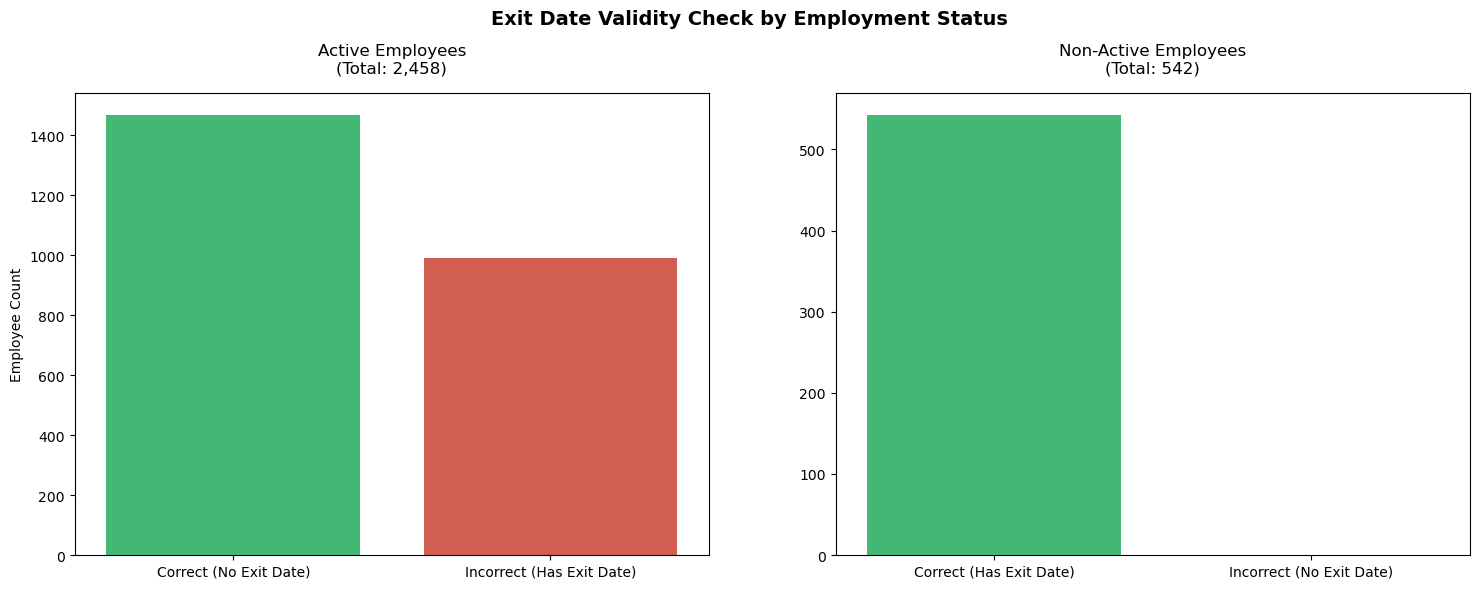

In [133]:
# check for any inconsistencies with active and non-active employees having exit dates
# Check for active employees with exit dates
# Check for non-active employees without exit dates

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# =========================================================
# 1. Active Employees (Should NOT have exit dates)
# =========================================================
active_df = messy_hr_dataset[messy_hr_dataset['EmployeeStatus'] == 'Active']
active_counts = {
    'Correct (No Exit Date)': active_df['ExitDate'].isnull().sum(),
    'Incorrect (Has Exit Date)': active_df['ExitDate'].notna().sum()
}

# Convert to DataFrame
active_plot_df = pd.DataFrame({
    'Category': list(active_counts.keys()),
    'Count': list(active_counts.values())
})

sns.barplot(
    data=active_plot_df,
    x='Category',
    y='Count',
    palette=['#2ecc71', '#e74c3c'], # Green for correct, Red for incorrect
    ax=ax[0]
)

ax[0].set_title(f'Active Employees\n(Total: {len(active_df):,})', pad=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Employee Count')

# =========================================================
# 2. Non-Active Employees (SHOULD have exit dates)
# =========================================================
non_active_df = messy_hr_dataset[messy_hr_dataset['EmployeeStatus'] != 'Active']
non_active_counts = {
    'Correct (Has Exit Date)': non_active_df['ExitDate'].notna().sum(),
    'Incorrect (No Exit Date)': non_active_df['ExitDate'].isnull().sum()
}

# Convert to DataFrame
non_active_plot_df = pd.DataFrame({
    'Category': list(non_active_counts.keys()),
    'Count': list(non_active_counts.values())
})

sns.barplot(
    data=non_active_plot_df,
    x='Category',
    y='Count',
    palette=['#2ecc71', '#e74c3c'], # Green for correct, Red for incorrect
    ax=ax[1]
)

ax[1].set_title(f'Non-Active Employees\n(Total: {len(non_active_df):,})', pad=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('')


plt.suptitle('Exit Date Validity Check by Employment Status', y=1.02, size=14, weight='bold')

plt.show()

In [134]:
# Simplify the TerminationType column into Voluntary and Involuntary

messy_hr_dataset['TerminationType'] = messy_hr_dataset['TerminationType'].map(lambda x: 'Voluntary' if x in ['Resignation', 'Retirement', 'Voluntary'] 
                                                  else 'Involuntary' if x == 'Involuntary' 
                                                  else np.nan)

messy_hr_dataset['TerminationType'].value_counts()

TerminationType
Voluntary      1145
Involuntary     388
Name: count, dtype: int64

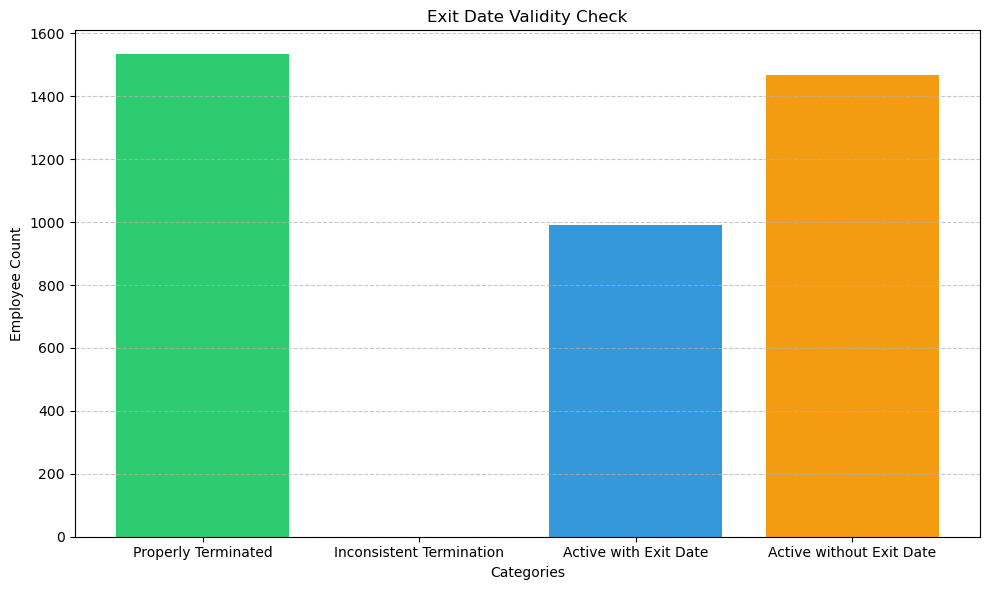

In [135]:
# Check for any inconsistencies with TerminationType and Exit Date

# Calculate the number of terminated employees with exit dates
terminated_with_exit_dates = messy_hr_dataset[
    (messy_hr_dataset['TerminationType'].notna()) & (messy_hr_dataset['ExitDate'].notna())
].shape[0]

# Calculate the number of terminated employees without exit dates
terminated_without_exit_dates = messy_hr_dataset[
    (messy_hr_dataset['TerminationType'].notna()) & (messy_hr_dataset['ExitDate'].isna())
].shape[0]

# Calculate the number of active employees with exit dates
active_with_exit_dates = messy_hr_dataset[
    (messy_hr_dataset['EmployeeStatus'] == 'Active') & (messy_hr_dataset['ExitDate'].notna())
].shape[0]

# Calculate the number of active employees without exit dates
active_without_exit_dates = messy_hr_dataset[
    (messy_hr_dataset['EmployeeStatus'] == 'Active') & (messy_hr_dataset['ExitDate'].isna())
].shape[0]

# Create a bar plot to visualize the counts
counts = [terminated_with_exit_dates, terminated_without_exit_dates, active_with_exit_dates, active_without_exit_dates]
labels = ['Properly Terminated', 'Inconsistent Termination', 'Active with Exit Date', 'Active without Exit Date']

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['#2ecc71', '#e74c3c', '#3498db', '#f39c12'])
plt.title('Exit Date Validity Check')
plt.xlabel('Categories')
plt.ylabel('Employee Count')
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [136]:
# Fix the EmployeeStatus column into Active and Inactive based on the TerminationType column
# Since the EmployeeStatus column is not consistent, while the TerminationType column is
# We will use the TerminationType column to fix the EmployeeStatus column.

messy_hr_dataset['EmployeeStatus'] = np.where(messy_hr_dataset['TerminationType'].notna(), 'Inactive', 'Active')

messy_hr_dataset['EmployeeStatus'].value_counts()

EmployeeStatus
Inactive    1533
Active      1467
Name: count, dtype: int64

In [137]:
# Add columns for age, tenure
from datetime import datetime

# Calculate Age from DOB
today = pd.to_datetime(datetime.today().date())
messy_hr_dataset['Age'] = (today - messy_hr_dataset['DOB']).dt.days // 365.25

# Calculate Tenure (handles active/inactive employees)
messy_hr_dataset['Tenure'] = np.where(
    messy_hr_dataset['EmployeeStatus'] == 'Active',
    (today - messy_hr_dataset['StartDate']).dt.days,
    (messy_hr_dataset['ExitDate'] - messy_hr_dataset['StartDate']).dt.days
) // 30.44  # Convert to months

In [138]:
# Convert data types for Age and Tenure to integer
messy_hr_dataset['Age'] = messy_hr_dataset['Age'].astype('Int64')
messy_hr_dataset['Tenure'] = messy_hr_dataset['Tenure'].astype('Int64')

# Reorder the columns
# reorder columns

new_order = [
    'Employee ID', 'Title', 'BusinessUnit', 'DepartmentType', 'Division', 'JobFunctionDescription', 'State', 'Location',
    'DOB','Age', 'GenderCode', 'RaceDesc', 'MaritalDesc', 'EmployeeStatus', 'EmployeeType', 'EmployeeClassificationType', 
    'PayZone', 'StartDate', 'ExitDate','Tenure', 'TerminationType','Performance Score', 'Current Employee Rating',
    'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score','Training Date', 'Training Program Name',
    'Training Type', 'Training Outcome', 'Training Duration(Days)', 'Training Cost'
]

messy_hr_dataset = messy_hr_dataset[new_order]
messy_hr_dataset.head(5)

,Employee ID,Title,BusinessUnit,DepartmentType,Division,JobFunctionDescription,State,Location,DOB,Age,GenderCode,RaceDesc,MaritalDesc,EmployeeStatus,EmployeeType,EmployeeClassificationType,PayZone,StartDate,ExitDate,Tenure,TerminationType,Performance Score,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost
0,3427,Production Technician I,CCDR,Production,Finance & Accounting,Accounting,MA,South Marisa,1969-10-07,55,Female,White,Widowed,Active,Contract,Temporary,Zone C,2019-09-20,NaT,66,NaN,Fully Meets,4,1,2,3,2023-07-15,Leadership Development,Internal,Failed,2,606.11
1,3428,Production Technician I,EW,Production,Aerial,Labor,MA,Tammieville,1965-08-30,59,Male,Hispanic,Widowed,Active,Contract,Part-Time,Zone A,2023-02-11,NaT,25,NaN,Fully Meets,3,2,1,5,2022-09-12,Customer Service,External,Incomplete,4,673.02
2,3429,Area Sales Manager,PL,Sales,General - Sga,Assistant,MA,East Roberthaven,1991-10-06,33,Male,Hispanic,Widowed,Active,Full-Time,Part-Time,Zone B,2018-12-10,NaT,75,NaN,Fully Meets,4,1,2,1,2022-08-13,Leadership Development,External,Failed,2,413.28
3,3430,Area Sales Manager,CCDR,Sales,Finance & Accounting,Clerk,ND,Garzatown,1998-04-04,26,Male,Other,Single,Active,Contract,Full-Time,Zone A,2021-06-21,NaT,45,NaN,Fully Meets,2,5,5,4,2022-12-15,Project Management,External,Completed,3,663.78
4,3431,Area Sales Manager,TNS,Sales,General - Con,Laborer,FL,Lake Meganville,1969-08-29,55,Female,Other,Married,Active,Contract,Temporary,Zone A,2019-06-29,NaT,68,NaN,Fully Meets,3,2,5,3,2023-07-13,Technical Skills,External,Failed,5,399.03


In [139]:
# Check if there is inconsistency between start date and exit date
inconsistent_start_exit = messy_hr_dataset[
    (messy_hr_dataset['ExitDate'] < messy_hr_dataset['StartDate'])
]

inconsistent_start_exit.shape[0]  # Number of inconsistent records

0

In [140]:
# Recall the unique values of each column

number_of_columns_displayed = 0

for column in messy_hr_dataset.columns:
    if messy_hr_dataset[column].unique().size < 30:
        print(f'{column} : {messy_hr_dataset[column].unique()}')
        number_of_columns_displayed += 1

print(f'\n{number_of_columns_displayed} columns were displayed')

print(f'\ncolumn not displayed\n')

for columns in messy_hr_dataset.columns:
    if messy_hr_dataset[columns].unique().size >= 30:
        print(f'{columns}')

BusinessUnit : <StringArray>
['CCDR', 'EW', 'PL', 'TNS', 'BPC', 'WBL', 'NEL', 'SVG', 'MSC', 'PYZ']
Length: 10, dtype: string
DepartmentType : <StringArray>
['Production       ', 'Sales', 'IT/IS', 'Executive Office', 'Software Engineering', 'Admin Offices']
Length: 6, dtype: string
Division : <StringArray>
['Finance & Accounting', 'Aerial', 'General - Sga', 'General - Con', 'Field Operations', 'General - Eng', 'Engineers', 'Executive', 'Splicing', 'Project Management - Con', 'Fielders', 'Project Management - Eng', 'Shop (Fleet)', 'Wireline Construction', 'Catv', 'Yard (Material Handling)', 'Wireless', 'People Services', 'Underground', 'Billable Consultants', 'Technology / It', 'Sales & Marketing', 'Safety', 'Isp', 'Corp Operations']
Length: 25, dtype: string
State : <StringArray>
['MA', 'ND', 'FL', 'CT', 'CA', 'OR', 'TX', 'IN', 'GA', 'CO', 'KY', 'NV', 'VT', 'PA', 'RI', 'VA', 'UT', 'ID', 'MT', 'WA', 'AZ', 'NH', 'AL', 'OH', 'NY', 'ME', 'TN', 'NC']
Length: 28, dtype: string
GenderCode : <S

In [141]:
# Check for any extra spaces in the values the DepartmentType column

messy_hr_dataset['DepartmentType'][messy_hr_dataset['DepartmentType'].str.contains(r'^\s+|\s+$', regex=True, na=False)].unique()

<StringArray>
['Production       ']
Length: 1, dtype: string

In [142]:
# Remove leading and trailing whitespaces

messy_hr_dataset['DepartmentType'] = messy_hr_dataset['DepartmentType'].str.strip()

messy_hr_dataset['DepartmentType'].unique()

<StringArray>
['Production', 'Sales', 'IT/IS', 'Executive Office', 'Software Engineering', 'Admin Offices']
Length: 6, dtype: string

In [143]:
# Ordinal Encoding

messy_hr_dataset['Performance Score'] = messy_hr_dataset['Performance Score'].replace({
    'PIP' : '1',
    'Needs Improvement' : '2',
    'Fully Meets' : '3',
    'Exceeds' : '4'
}).astype('Int64')

messy_hr_dataset['Performance Score'].unique()

<IntegerArray>
[3, 4, 2, 1]
Length: 4, dtype: Int64

In [144]:
# Lets explore the columns not displayed

print(messy_hr_dataset['Training Cost'].describe())

print(messy_hr_dataset['JobFunctionDescription'].unique().size)

print(messy_hr_dataset['Location'].unique().size)

print(messy_hr_dataset['Title'].unique().size)

count    3000.000000
mean      558.628697
std       263.217698
min       100.040000
25%       327.587500
50%       572.125000
75%       786.987500
max       999.970000
Name: Training Cost, dtype: float64
83
2738
32


In [145]:
# Drop columns with high cardinality and low priority

columns_to_drop = ['JobFunctionDescription', 'Location']

messy_hr_dataset.drop(columns=columns_to_drop, inplace=True)

messy_hr_dataset.columns.to_list() , messy_hr_dataset.columns.size

(['Employee ID',
  'Title',
  'BusinessUnit',
  'DepartmentType',
  'Division',
  'State',
  'DOB',
  'Age',
  'GenderCode',
  'RaceDesc',
  'MaritalDesc',
  'EmployeeStatus',
  'EmployeeType',
  'EmployeeClassificationType',
  'PayZone',
  'StartDate',
  'ExitDate',
  'Tenure',
  'TerminationType',
  'Performance Score',
  'Current Employee Rating',
  'Engagement Score',
  'Satisfaction Score',
  'Work-Life Balance Score',
  'Training Date',
  'Training Program Name',
  'Training Type',
  'Training Outcome',
  'Training Duration(Days)',
  'Training Cost'],
 30)

In [146]:
messy_hr_dataset['Title'].value_counts()

Title
Production Technician I         1321
Production Technician II         516
Area Sales Manager               297
Production Manager               154
Software Engineer                 90
IT Support                        88
Network Engineer                  55
Sr. Network Engineer              50
Data Analyst                      47
BI Developer                      44
Administrative Assistant          33
Accountant I                      33
Sales Manager                     30
Senior BI Developer               30
Database Administrator            25
IT Manager - DB                   22
Shared Services Manager           20
Sr. Accountant                    13
IT Manager - Support              11
Director of Sales                 11
Director of Operations            11
IT Manager - Infra                11
IT Director                       11
President & CEO                   11
BI Director                       11
CIO                               11
Software Engineering Manager    

In [147]:
# Define regex patterns and replacements
standardization_patterns = {
    r'\bSr\.?\s': 'Senior ',  # Fix for Sr. (with or without a dot)
    r'\bBI\b': 'Business Intelligence',  # BI → Business Intelligence
    r'\bCIO\b': 'Chief Information Officer',  # CIO → Chief Information Officer
    r'\bCEO\b': 'Chief Executive Officer',  # CEO → Chief Executive Officer
    r'\bDBA\b': 'Database Administrator',  # DBA → Database Administrator
    r'\bInfra\b': 'Infrastructure',  # Infra → Infrastructure
    r'\bDB\b': 'Database',  # DB → Database
}

# Apply regex replacements
for pattern, replacement in standardization_patterns.items():
    messy_hr_dataset['Title'] = messy_hr_dataset['Title'].str.replace(pattern, replacement, regex=True)

messy_hr_dataset['Title'].value_counts()

Title
Production Technician I                   1321
Production Technician II                   516
Area Sales Manager                         297
Production Manager                         154
Software Engineer                           90
IT Support                                  88
Network Engineer                            55
Senior Network Engineer                     50
Data Analyst                                47
Business Intelligence Developer             44
Administrative Assistant                    33
Accountant I                                33
Sales Manager                               30
Senior Business Intelligence Developer      30
Database Administrator                      25
IT Manager - Database                       22
Shared Services Manager                     20
Senior Accountant                           13
IT Manager - Support                        11
Director of Sales                           11
Director of Operations                      11
IT Mana

In [148]:
# Recall the unique values of each column

number_of_columns_displayed = 0

for column in messy_hr_dataset.columns:
    if messy_hr_dataset[column].unique().size < 35:
        print(f'{column} : {messy_hr_dataset[column].unique()}')
        number_of_columns_displayed += 1

print(f'\n{number_of_columns_displayed} columns were displayed')

print(f'\ncolumn not displayed\n')

for columns in messy_hr_dataset.columns:
    if messy_hr_dataset[columns].unique().size >= 30:
        print(f'{columns}')

Title : <StringArray>
['Production Technician I', 'Area Sales Manager', 'Production Technician II', 'IT Support', 'Network Engineer', 'Senior Network Engineer', 'Principal Data Architect', 'Enterprise Architect', 'Senior Database Administrator', 'Database Administrator', 'Data Analyst', 'Data Analyst ', 'Data Architect', 'Chief Information Officer', 'Business Intelligence Director', 'Senior Accountant', 'Software Engineering Manager', 'Software Engineer', 'Shared Services Manager', 'Senior Business Intelligence Developer', 'Production Manager', 'President & Chief Executive Officer', 'Administrative Assistant', 'Accountant I', 'Business Intelligence Developer', 'Sales Manager', 'IT Manager - Support', 'IT Manager - Infrastructure', 'IT Manager - Database', 'Director of Sales', 'Director of Operations', 'IT Director']
Length: 32, dtype: string
BusinessUnit : <StringArray>
['CCDR', 'EW', 'PL', 'TNS', 'BPC', 'WBL', 'NEL', 'SVG', 'MSC', 'PYZ']
Length: 10, dtype: string
DepartmentType : <Str

In [149]:
messy_hr_dataset.to_csv('Clean_HR_Dataset.csv',date_format="%Y-%m-%d", index=False)